<a href="https://colab.research.google.com/github/edypj/DataPrediction/blob/main/PrediksiKelulusan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
uploaded = files.upload()

In [ ]:
df = pd.read_excel('InformatikaUPR.xlsx')

In [ ]:
print(df.head())

   No.                     Nama           NIM  Tahun Lulus  TAHUN MASUK   JK  \
0    1                 Oktafiani  DBC 113 003       2020.0       2013.0  NaN   
1    2               Zainul Azim  DBC 115 084       2020.0       2015.0  NaN   
2    3                  Martalia  DBC 115 017       2020.0       2015.0  NaN   
3    4          Andrian Darmawan  DBC 113 051       2020.0       2013.0  NaN   
4    5  Febry Aster Yansen Basah  DBC 112 091       2020.0       2012.0  NaN   

   IPS 1  SKS 1  IPS 2  SKS 2  ... ASAL SEKOLAH  BEASISWA  UKT  \
0    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
1    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
2    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
3    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   
4    NaN    NaN    NaN    NaN  ...          NaN       NaN  NaN   

   PEKERJAAN AYAH  PEKERJAAN IBU PENGHASILAN ORANGTUA Unnamed: 21  \
0             NaN            NaN                  NaN

In [ ]:
print(df.dtypes)

No.                       int64
Nama                     object
NIM                      object
Tahun Lulus             float64
TAHUN MASUK             float64
JK                       object
IPS 1                   float64
SKS 1                   float64
IPS 2                   float64
SKS 2                   float64
IPS 3                    object
SKS 3                   float64
IPS 4                   float64
SKS 4                   float64
IPK                     float64
ASAL SEKOLAH             object
BEASISWA                 object
UKT                     float64
PEKERJAAN AYAH           object
PEKERJAAN IBU            object
PENGHASILAN ORANGTUA    float64
Unnamed: 21             float64
Unnamed: 22             float64
Unnamed: 23             float64
Unnamed: 24              object
dtype: object


In [ ]:
selected_columns = ['Tahun Lulus','TAHUN MASUK', 'IPS 1', 'SKS 1', 'IPS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
df_selected = df[selected_columns]

# Menampilkan hasil
print(df_selected)


NameError: name 'df' is not defined

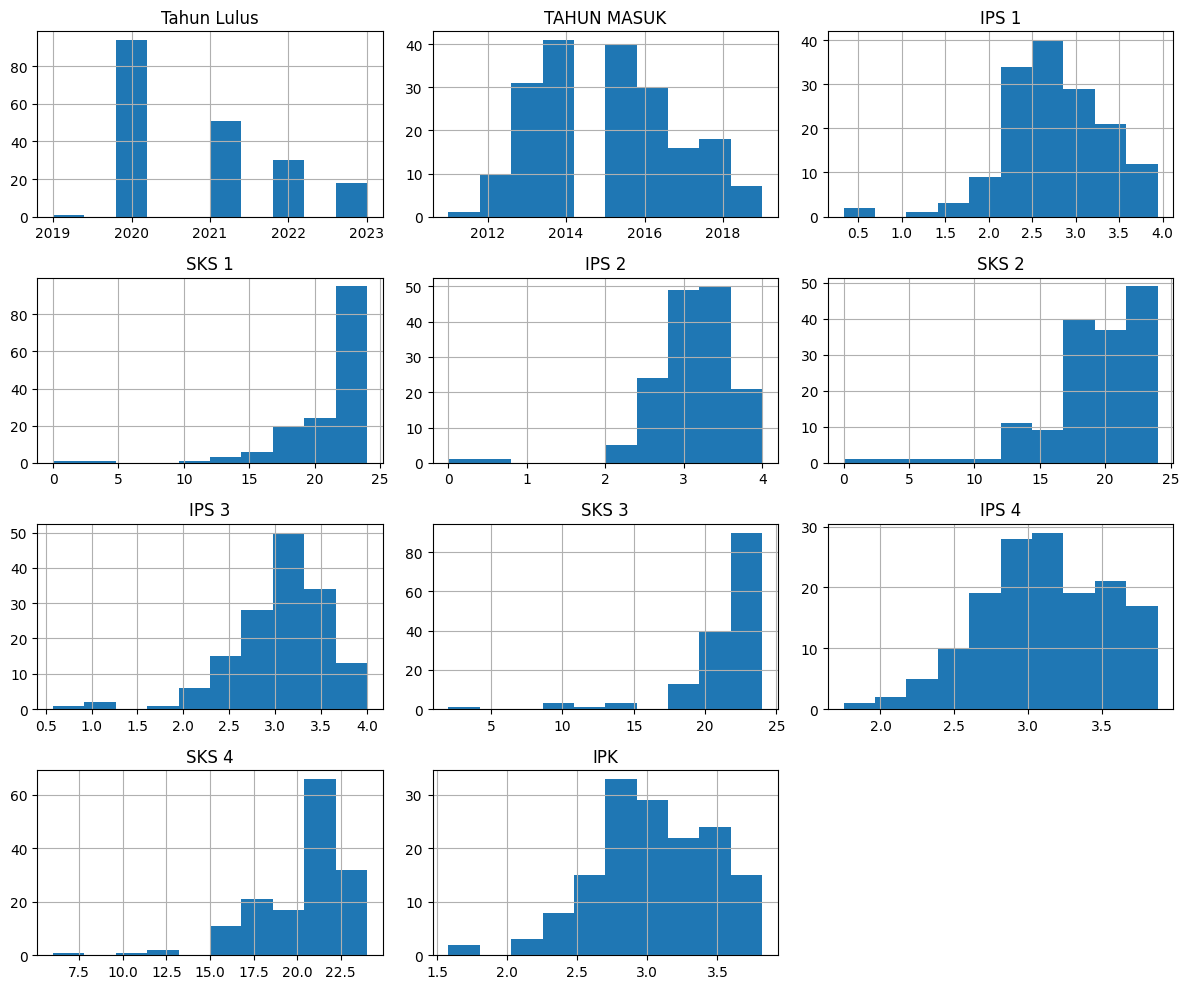

In [ ]:
# Membuat histogram untuk setiap kolom
df_selected.hist(bins=10, figsize=(12, 10))  # Anda dapat mengubah jumlah bins sesuai kebutuhan
plt.tight_layout()  # Mengatur tata letak agar lebih rapi
plt.show()

<ipython-input-11-7613896bb0c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected.loc[df_selected[col].isnull(), col] = col_mean


Tahun Lulus    float64
TAHUN MASUK    float64
IPS 1          float64
SKS 1          float64
IPS 2          float64
SKS 2          float64
IPS 3          float64
SKS 3          float64
IPS 4          float64
SKS 4          float64
IPK            float64
dtype: object
     Tahun Lulus  TAHUN MASUK     IPS 1      SKS 1     IPS 2      SKS 2  \
0    2020.000000  2013.000000  2.740993  21.450331  3.114371  18.933775   
1    2020.000000  2015.000000  2.740993  21.450331  3.114371  18.933775   
2    2020.000000  2015.000000  2.740993  21.450331  3.114371  18.933775   
3    2020.000000  2013.000000  2.740993  21.450331  3.114371  18.933775   
4    2020.000000  2012.000000  2.740993  21.450331  3.114371  18.933775   
..           ...          ...       ...        ...       ...        ...   
317  2020.845361  2015.036082  2.740993  21.450331  3.114371  18.933775   
318  2020.845361  2015.036082  2.740993  21.450331  3.114371  18.933775   
319  2020.845361  2015.036082  2.740993  21.450331  3.1143

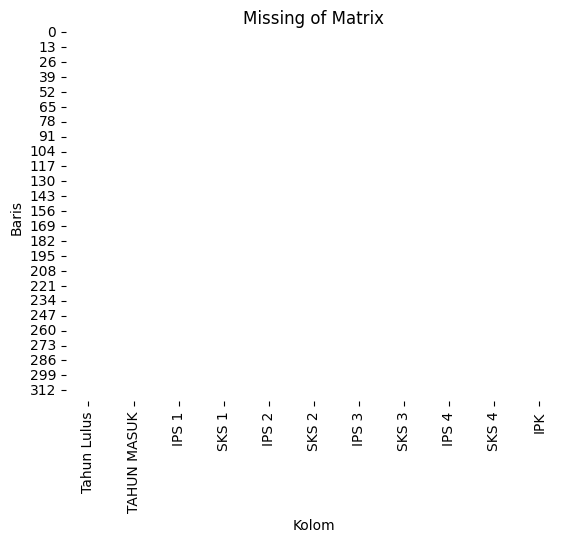

In [ ]:
# Mengganti nilai kosong (NaN) dengan nilai rata-rata dari setiap kolom
for col in df_selected.columns:
    col_mean = df_selected[col].mean()
    df_selected.loc[df_selected[col].isnull(), col] = col_mean

# Mengonversi semua kolom ke tipe data float setelah menangani nilai kosong
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')  # errors='coerce' akan mengubah nilai yang tidak dapat diubah menjadi NaN

# Menampilkan tipe data setelah konversi
print(df_selected.dtypes)
print(df_selected)
# Membuat matriks ketidakhadiran (missing of matrix)
missing_matrix = df_selected.isnull().astype(int)

# Visualisasi matriks ketidakhadiran
sns.heatmap(missing_matrix, cmap='binary', cbar=False)
plt.title('Missing of Matrix')
plt.xlabel('Kolom')
plt.ylabel('Baris')
plt.show()


In [ ]:
# Memilih hanya kolom yang Anda butuhkan
selected_columns = ['Tahun Lulus', 'TAHUN MASUK', 'IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']
df_selected = df[selected_columns]

# Konversi kolom DataFrame yang lain menjadi tipe numerik
df_selected = df_selected.apply(pd.to_numeric, errors='coerce')  # errors='coerce' akan mengubah nilai yang tidak dapat diubah menjadi NaN

# Mengganti nilai NaN dengan nilai rata-rata dari setiap kolom
for col in df_selected.columns:
    col_mean = df_selected[col].mean()
    df_selected[col].fillna(col_mean, inplace=True)

# Menambahkan variabel baru untuk menunjukkan apakah lulus tepat waktu atau tidak
df_selected['Lulus Tepat Waktu'] = df_selected['Tahun Lulus'] <= df_selected['TAHUN MASUK'] + 4

# Ubah tipe data kolom 'Lulus Tepat Waktu' kembali ke float
df_selected['Lulus Tepat Waktu'] = df_selected['Lulus Tepat Waktu'].astype(float)

# Pisahkan variabel independen dan dependen
X = df_selected[['IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK', 'Lulus Tepat Waktu']]
y = df_selected['Tahun Lulus']

# Tambahkan konstanta ke variabel independen (bias)
X = sm.add_constant(X)

# Bangun model regresi
model = sm.OLS(y, X).fit()

# Tampilkan ringkasan hasil regresi
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Tahun Lulus   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     10.14
Date:                Fri, 29 Mar 2024   Prob (F-statistic):           9.00e-15
Time:                        13:58:03   Log-Likelihood:                -331.01
No. Observations:                 322   AIC:                             684.0
Df Residuals:                     311   BIC:                             725.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2020.1849      0.61

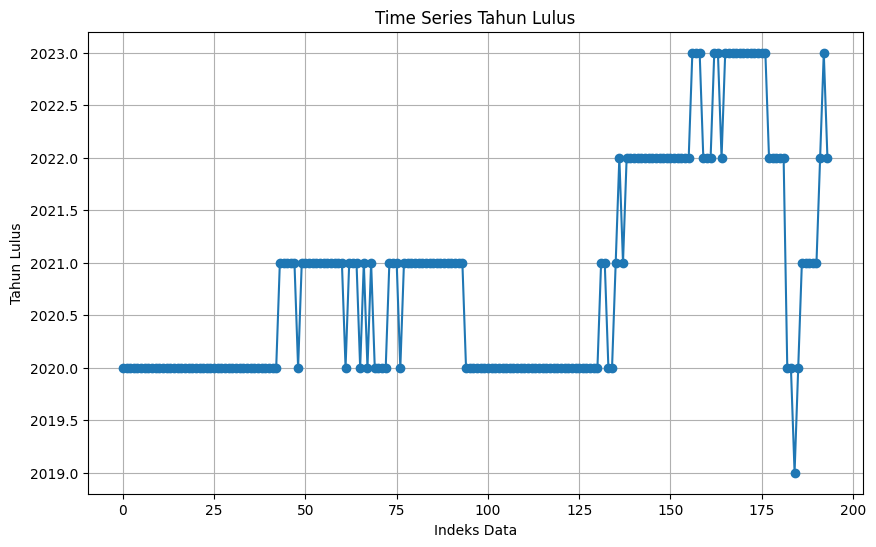

In [ ]:
# Menampilkan time series dari 'Tahun Lulus'
plt.figure(figsize=(10, 6))
plt.plot(df['Tahun Lulus'], marker='o', linestyle='-')
plt.title('Time Series Tahun Lulus')
plt.xlabel('Indeks Data')
plt.ylabel('Tahun Lulus')
plt.grid(True)
plt.show()

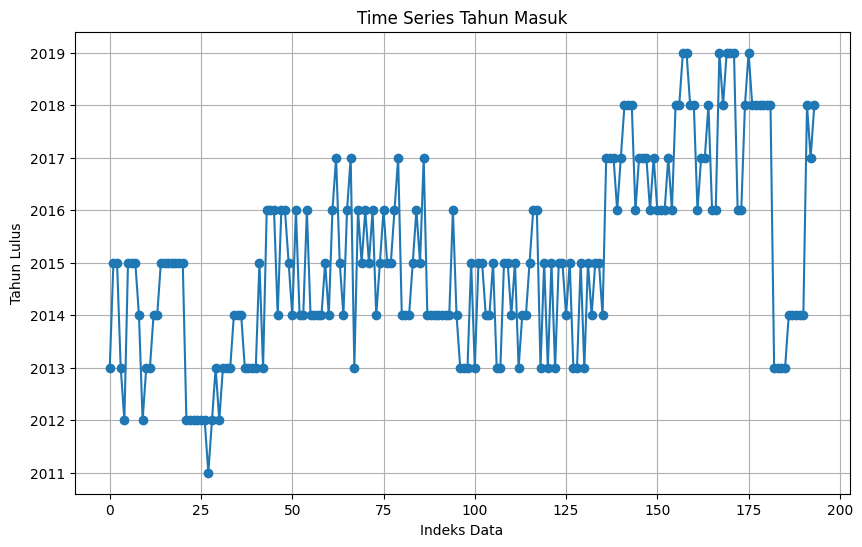

In [ ]:
# Menampilkan time series dari 'Tahun Lulus'
plt.figure(figsize=(10, 6))
plt.plot(df['TAHUN MASUK'], marker='o', linestyle='-')
plt.title('Time Series Tahun Masuk')
plt.xlabel('Indeks Data')
plt.ylabel('Tahun Lulus')
plt.grid(True)
plt.show()

In [ ]:
print(df_selected)

,Tahun Lulus,TAHUN MASUK,IPS 1,SKS 1,IPS 2,SKS 2,IPS 3,SKS 3,IPS 4,SKS 4,IPK,Lulus Tepat Waktu
0,2020.000000,2013.000000,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
1,2020.000000,2015.000000,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
2,2020.000000,2015.000000,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
3,2020.000000,2013.000000,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
4,2020.000000,2012.000000,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
317,2020.845361,2015.036082,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
318,2020.845361,2015.036082,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
319,2020.845361,2015.036082,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0
320,2020.845361,2015.036082,2.740993,21.450331,3.114371,18.933775,3.056533,21.834437,3.112318,20.258278,3.040464,0.0


In [ ]:
def create_time_windows(data, window_size):
    """
    Create sequential time windows from a time series data.

    Parameters:
    - data: Time series data as a pandas DataFrame.
    - window_size: Size of the window.

    Returns:
    - windows: List of tuples, where each tuple represents a window containing sequential data points.
    """
    windows = []
    for i in range(len(data) - window_size + 1):
        window = tuple(data.iloc[i:i+window_size].values)
        windows.append(window)
    return windows

# Contoh penggunaan dengan data 'Tahun Lulus' dan 'Tahun Masuk'
window_size = 4  # Ubah sesuai kebutuhan Anda
columns_to_use = ['Tahun Lulus', 'TAHUN MASUK']  # Kolom yang ingin digunakan sebagai deret waktu
windows = create_time_windows(df_selected[columns_to_use], window_size)
print("Sequential time windows:")
for window in windows:
    print(window)

Sequential time windows:
(array([2020., 2013.]), array([2020., 2015.]), array([2020., 2015.]), array([2020., 2013.]))
(array([2020., 2015.]), array([2020., 2015.]), array([2020., 2013.]), array([2020., 2012.]))
(array([2020., 2015.]), array([2020., 2013.]), array([2020., 2012.]), array([2020., 2015.]))
(array([2020., 2013.]), array([2020., 2012.]), array([2020., 2015.]), array([2020., 2015.]))
(array([2020., 2012.]), array([2020., 2015.]), array([2020., 2015.]), array([2020., 2015.]))
(array([2020., 2015.]), array([2020., 2015.]), array([2020., 2015.]), array([2020., 2014.]))
(array([2020., 2015.]), array([2020., 2015.]), array([2020., 2014.]), array([2020., 2012.]))
(array([2020., 2015.]), array([2020., 2014.]), array([2020., 2012.]), array([2020., 2013.]))
(array([2020., 2014.]), array([2020., 2012.]), array([2020., 2013.]), array([2020., 2013.]))
(array([2020., 2012.]), array([2020., 2013.]), array([2020., 2013.]), array([2020., 2014.]))
(array([2020., 2013.]), array([2020., 2013.])

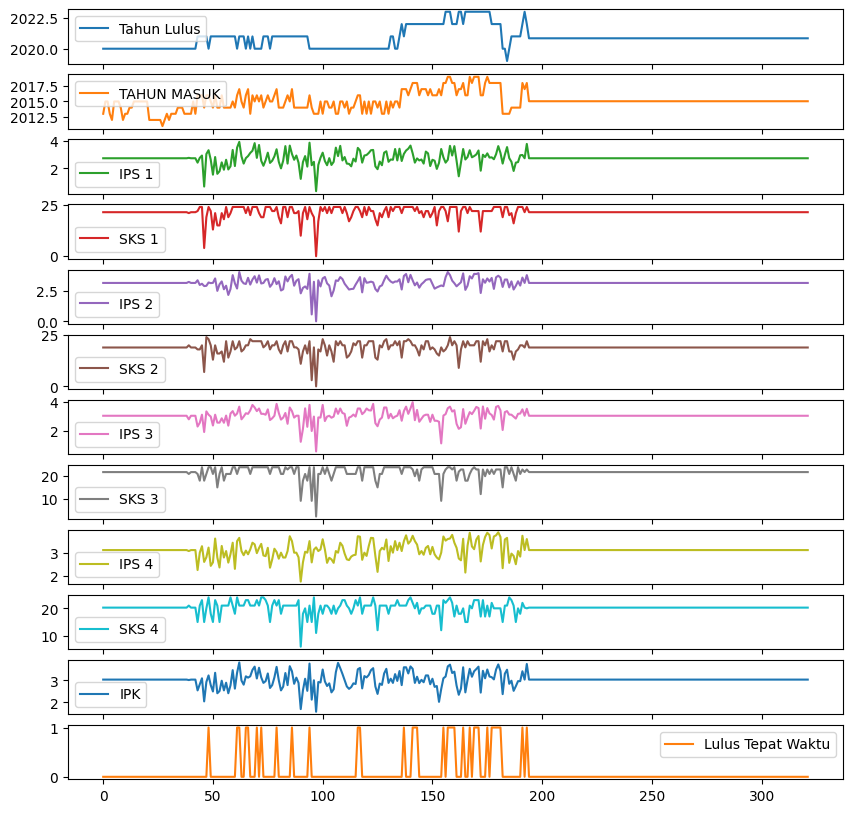

In [ ]:
df_selected.plot(subplots=True, figsize=(10, 10))
plt.show()


In [ ]:
# Analisis ACF
acf_result = sm.tsa.acf(df_selected['Tahun Lulus'], nlags=20)

# Analisis PACF
pacf_result = sm.tsa.pacf(df_selected['Tahun Lulus'], nlags=20)

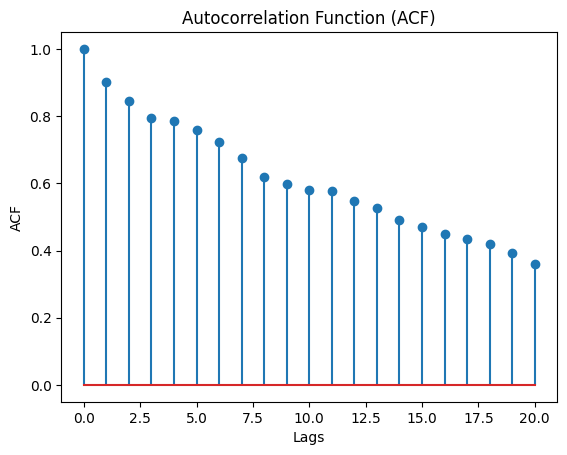

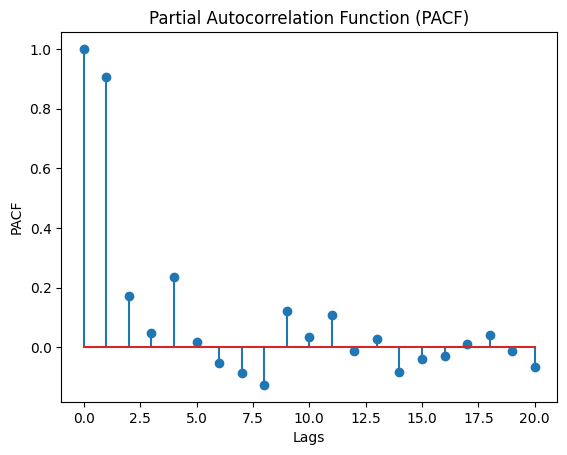

In [ ]:
# Plot ACF
plt.stem(acf_result)
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plt.stem(pacf_result)
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()


In [ ]:
# Persiapkan data
X = df_selected[['TAHUN MASUK', 'IPS 1', 'SKS 1', 'IPS 2', 'SKS 2', 'IPS 3', 'SKS 3', 'IPS 4', 'SKS 4', 'IPK']]
y = df_selected['Tahun Lulus']

# Bagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Pilih model regresi linear
model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Membuat fungsi untuk memprediksi tahun lulus
def predict_graduation_year(tahun_masuk, ips1, sks1, ips2, sks2, ips3, sks3, ips4, sks4, ipk):
    # Membuat dataframe dengan input yang diberikan
    input_data = pd.DataFrame({
        'TAHUN MASUK': [tahun_masuk],
        'IPS 1': [ips1],
        'SKS 1': [sks1],
        'IPS 2': [ips2],
        'SKS 2': [sks2],
        'IPS 3': [ips3],
        'SKS 3': [sks3],
        'IPS 4': [ips4],
        'SKS 4': [sks4],
        'IPK': [ipk]
    })

    # Melakukan prediksi tahun lulus
    predicted_year = model.predict(input_data)
    return predicted_year[0]

# Memasukkan nilai secara manual
tahun_masuk = int(input("Masukkan tahun masuk: "))
ips1 = float(input("Masukkan IPS semester 1: "))
sks1 = int(input("Masukkan SKS semester 1: "))
ips2 = float(input("Masukkan IPS semester 2: "))
sks2 = int(input("Masukkan SKS semester 2: "))
ips3 = float(input("Masukkan IPS semester 3: "))
sks3 = int(input("Masukkan SKS semester 3: "))
ips4 = float(input("Masukkan IPS semester 4: "))
sks4 = int(input("Masukkan SKS semester 4: "))
ipk = float(input("Masukkan IPK: "))

# Memanggil fungsi untuk memprediksi tahun lulus
predicted_graduation_year = predict_graduation_year(tahun_masuk, ips1, sks1, ips2, sks2, ips3, sks3, ips4, sks4, ipk)
print("Tahun lulus yang diprediksi:", int(predicted_graduation_year))

Masukkan tahun masuk: 2020
Masukkan IPS semester 1: 2.77
Masukkan SKS semester 1: 21
Masukkan IPS semester 2: 3.20
Masukkan SKS semester 2: 20
Masukkan IPS semester 3: 2.81
Masukkan SKS semester 3: 21
Masukkan IPS semester 4: 3.07
Masukkan SKS semester 4: 21
Masukkan IPK: 3.02
Tahun lulus yang diprediksi: 2022
